In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.spatial import distance

from utils import *

In [2]:
from optimization.range.MethodSven import method_sven_iterations_list
from optimization.range.MethodSven import method_sven

from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_list
from optimization.range.SearchDichotomous import search_dichotomous

from optimization.range.HalvingMethod import halving_method
from optimization.range.HalvingMethod import halving_method_iterations_list

from optimization.range.SearchGoldenSection import search_golden_section
from optimization.range.SearchGoldenSection import search_golden_section_iterations_list

from optimization.range.SearchPitchAdaptation import search_pitch_adaptation
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_list
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_label

from interpolition.ThreePointQuadratic import threePointQuadratic
from interpolition.ThreePointQuadratic import threePointQuadratic_list
from interpolition.ThreePointQuadratic import threePointQuadratic_label

from interpolition.CubicInterpolation import cubicInterpolation
from interpolition.CubicInterpolation import threePointQuadratic_list
from interpolition.CubicInterpolation import threePointQuadratic_label

from optimization.n_dimensional.CoordinateDescent import get_coordinate_descent
from optimization.n_dimensional.CoordinateDescent import coordinate_descent_iter_list

from optimization.n_dimensional.MethodOfSteepestDescent import get_method_of_steepest_descent
from optimization.n_dimensional.MethodOfSteepestDescent import method_of_steepest_descent_iter_list

from utils.utils import to_nd_array

In [3]:
x0 = 3.0
h = 2.0
n = 200

count_invoke = 0
f = lambda x: 20 * (x + 5).__pow__(2)
f_arr = lambda X: np.transpose([X, f(X)])

columns = ['x', 'y', 'h']
epsilon = 0.02
iter = 500

In [4]:
def f(X):
    return (X[0] - 1) ** 2 + (X[1] - 1) ** 2


nd_start_point = np.array([-15.0, -15.0])
nd_epsilon = 0.1
nd_iter = 200


def derivative(X):
    return optimize.approx_fprime(X, f, epsilon)

In [5]:
def draw_3d_function(f, steps, width, height):
    X, Y = np.meshgrid(np.linspace(-width, width, 30), np.linspace(-height, height, 30))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')

    zs = np.array([f(np.array([x, y])) for x, y in zip(np.ravel(Y), np.ravel(X))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)
    ax.plot(xs=steps[0], ys=steps[1], zs=steps[2],
            marker='*', markersize=20, zorder=3,
            markerfacecolor='y', lw=3, c='black')
    return ax


def add_sven_to_optimisation(optimization_algoritm):
    def optimization(f, x):
        range = method_sven(0, h, f, n)
        result = optimization_algoritm(f, min(range), max(range), epsilon=epsilon, iter=iter)
        return result[0]

    return optimization

[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]


<ipython-input-13-29c894b73b0c>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
<ipython-input-13-29c894b73b0c>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
<ipython-input-13-29c894b73b0c>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

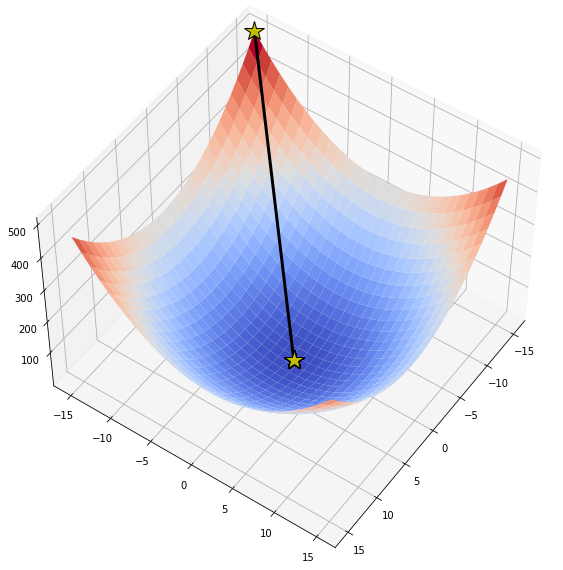

array([0.97609602, 0.97609602])

In [13]:
from utils.utils import to_nd_array

opt_fun = get_method_of_steepest_descent(add_sven_to_optimisation(search_dichotomous))
res = opt_fun(f, derivative, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
    np.array(np.array(method_of_steepest_descent_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
res

In [14]:
np.array(method_of_steepest_descent_iter_list)

<ipython-input-14-ede0f385c982>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(method_of_steepest_descent_iter_list)


array([[array([-15., -15.]), 512.0, 0],
       [array([0.99204322, 0.99204322]), 0.00012662057771464972,
        22.616164417033815],
       [array([0.97609602, 0.97609602]), 0.0011428000541971078,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771464972,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541971078,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771464972,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541971078,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771464972,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541971078,
        0.022552744890219724],
       [array([0.99204322, 0.99204322]), 0.00012662057771464972,
        0.022552744890219724],
       [array([0.97609602, 0.97609602]), 0.0011428000541971078,
        0.022552744890219724],
       

[0.70710678 0.70710678]
[-0.70710678 -0.70710678]


<ipython-input-15-001df03195ae>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
<ipython-input-15-001df03195ae>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
<ipython-input-15-001df03195ae>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

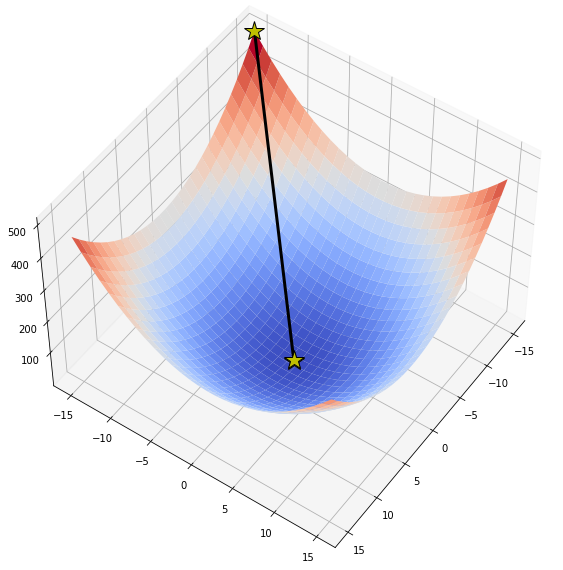

array([0.991851, 0.991851])

In [15]:
from utils.utils import to_nd_array

opt_fun = get_method_of_steepest_descent(add_sven_to_optimisation(halving_method))
res = opt_fun(f, derivative, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
    np.array(np.array(method_of_steepest_descent_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
res

In [17]:
np.array(method_of_steepest_descent_iter_list)

<ipython-input-17-ede0f385c982>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(method_of_steepest_descent_iter_list)


array([[array([-15., -15.]), 512.0, 0],
       [array([0.99822988, 0.99822988]), 6.266631554964939e-06,
        22.62491367386846],
       [array([0.991851, 0.991851]), 0.000132812303751354,
        0.009021097956087826]], dtype=object)

[0.70710678 0.70710678]
[-0.70710678 -0.70710678]


<ipython-input-18-bcaee0d96c73>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
<ipython-input-18-bcaee0d96c73>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
<ipython-input-18-bcaee0d96c73>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

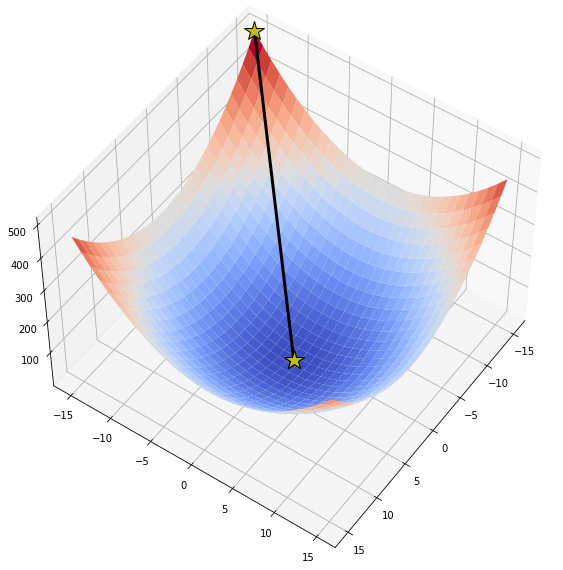

array([0.97771467, 0.97771467])

In [18]:
from utils.utils import to_nd_array

opt_fun = get_method_of_steepest_descent(add_sven_to_optimisation(search_golden_section))
res = opt_fun(f, derivative, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
    np.array(np.array(method_of_steepest_descent_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
res

In [19]:
np.array(method_of_steepest_descent_iter_list)

<ipython-input-19-ede0f385c982>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(method_of_steepest_descent_iter_list)


array([[array([-15., -15.]), 512.0, 0],
       [array([0.99099192, 0.99099192]), 0.0001622910953936833,
        22.61467764573349],
       [array([0.97771467, 0.97771467]), 0.00099327161538426,
        0.018776859709319006]], dtype=object)

[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]
[0.70710678 0.70710678]
[0.70710678 0.70710678]
[-0.70710678 -0.70710678]
[-0.70710678 -0.70710678]


<ipython-input-20-2b55d21d8976>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
<ipython-input-20-2b55d21d8976>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
<ipython-input-20-2b55d21d8976>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

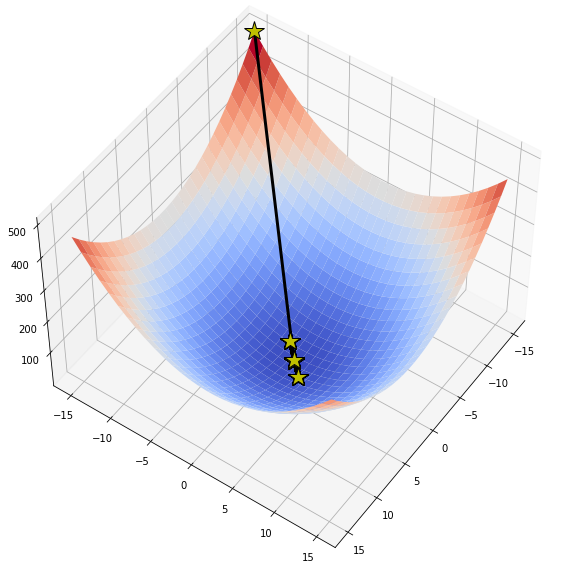

array([2.61527585, 2.61527585])

In [20]:
from utils.utils import to_nd_array

opt_fun = get_method_of_steepest_descent(add_sven_to_optimisation(search_pitch_adaptation))
res = opt_fun(f, derivative, nd_start_point, epsilon, nd_iter)

steps = [
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 0]),
    np.array(to_nd_array(np.array(method_of_steepest_descent_iter_list)[:, 0])[:, 1]),
    np.array(np.array(method_of_steepest_descent_iter_list)[:, 1])
]

ax = draw_3d_function(f, np.array(steps), 15, 15)

ax.view_init(50, 35)
plt.show()
res

In [21]:
np.array(method_of_steepest_descent_iter_list)

<ipython-input-21-ede0f385c982>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(method_of_steepest_descent_iter_list)


array([[array([-15., -15.]), 512.0, 0],
       [array([0.98228268, 0.98228268]), 0.0006278065932959639,
        22.602360928978236],
       [array([2.61527585, 2.61527585]), 5.218232114511018,
        2.309401076758503],
       [array([1.0077982, 1.0077982]), 0.00012162390451036237,
        2.273316684934152],
       [array([-0.62519496, -0.62519496]), 5.282517315986788,
        2.309401076758503],
       [array([0.98228268, 0.98228268]), 0.0006278065932959639,
        2.2733166849341515],
       [array([2.61527585, 2.61527585]), 5.218232114511018,
        2.309401076758503],
       [array([1.0077982, 1.0077982]), 0.00012162390451036237,
        2.273316684934152],
       [array([-0.62519496, -0.62519496]), 5.282517315986788,
        2.309401076758503],
       [array([0.98228268, 0.98228268]), 0.0006278065932959639,
        2.2733166849341515],
       [array([2.61527585, 2.61527585]), 5.218232114511018,
        2.309401076758503],
       [array([1.0077982, 1.0077982]), 0.00012162390451